<a href="https://colab.research.google.com/github/thinhhoUB/Exploratory-Project-Buffalo-Crime/blob/main/Buffalo_Crime_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Analysis of the city of Buffalo New York

Currently, I am a junior studying at the State University of New York at Buffalo. Inspiring from that, for this project, I decide work with **public dataset about crime incidents from Open Data Buffalo website**. I hope I will gain a better understanding from the city where I am living and studying. 

## (A) DATA CLEANING 

In [ ]:
pip install sodapy

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata

In [ ]:
#credits goes to open data Buffalo website

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.buffalony.gov", None)

# First 27734 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("d6g9-xbgu", limit= 277734)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
#first 5 rows and last 5 rows of dataframe
results_df.head()

,case_number,incident_datetime,incident_type_primary,incident_description,address_1,city,state,created_at,hour_of_day,day_of_week,parent_incident_type,zip,latitude,longitude,location,census_tract_1,census_block_1,census_block_group_1,neighborhood_1,police_district_1,council_district_1,census_tract_2010,census_block_group_2010,census_block_2010,:@computed_region_kwzn_pe6v,:@computed_region_eziv_p4ck,:@computed_region_uh5x_q5mi,:@computed_region_dwzh_dtk5,:@computed_region_xbxg_7ifr,:@computed_region_tmcg_v66k,:@computed_region_fk4y_hpmh,:@computed_region_ff6v_jbaa
0,21-2590758,2021-09-16T17:20:02.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,2100 Block ELMWOOD AV,Buffalo,NY,2021-09-16T17:21:02.000,17,THURSDAY,Theft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21-2540744,2021-09-11T16:36:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,WASHINGTON ST & ST MICHAELS PL,Buffalo,NY,2021-09-11T16:37:00.000,16,SATURDAY,Theft,14203,42.891,-78.872,"{'type': 'Point', 'coordinates': [-78.872, 42....",165,2004,2,Central,District B,ELLICOTT,165,1,1006,14,77,31,914,4,4,1,80
2,21-2540255,2021-09-11T06:00:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,0 Block KEPPEL ST,Buffalo,NY,2021-09-11T06:25:49.000,6,SATURDAY,Theft,14220,42.858,-78.827,"{'type': 'Point', 'coordinates': [-78.827, 42....",2,1002,1,Hopkins-Tifft,District A,LOVEJOY,2,1,1003,9,1,133,819,10,2,4,40
3,21-2550922,2021-09-12T21:20:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,100 Block BAILEY AV,Buffalo,NY,2021-09-12T21:21:00.000,21,SUNDAY,Theft,14220,42.86,-78.825,"{'type': 'Point', 'coordinates': [-78.825, 42....",2,1000,1,Hopkins-Tifft,District A,LOVEJOY,2,1,1000,9,1,133,547,10,2,4,40
4,21-2560651,2021-09-13T16:04:47.000,ASSAULT,Buffalo Police are investigating this report o...,400 Block JEFFERSON AV,Buffalo,NY,2021-09-13T16:05:47.000,16,MONDAY,Assault,14204,42.888,-78.854,"{'type': 'Point', 'coordinates': [-78.854, 42....",15,2010,2,Broadway Fillmore,District C,ELLICOTT,15,2,2010,16,20,93,490,22,4,1,84


In [ ]:
results_df.tail()

,case_number,incident_datetime,incident_type_primary,incident_description,address_1,city,state,created_at,hour_of_day,day_of_week,parent_incident_type,zip,latitude,longitude,location,census_tract_1,census_block_1,census_block_group_1,neighborhood_1,police_district_1,council_district_1,census_tract_2010,census_block_group_2010,census_block_2010,:@computed_region_kwzn_pe6v,:@computed_region_eziv_p4ck,:@computed_region_uh5x_q5mi,:@computed_region_dwzh_dtk5,:@computed_region_xbxg_7ifr,:@computed_region_tmcg_v66k,:@computed_region_fk4y_hpmh,:@computed_region_ff6v_jbaa
277729,19-1661007,2019-06-15T22:00:00.000,ROBBERY,Buffalo Police are investigating this report o...,MASSACHUSETTS AV & PLYMOUTH AV,BUFFALO,NY,2019-06-16T06:04:00.000,22,Saturday,Robbery,14213,42.912,-78.891,"{'type': 'Point', 'coordinates': [-78.891, 42....",69.01,3000,3,West Side,District B,NIAGARA,69.01,3,3000,2,41,233,2826,29,3,1,67
277730,12-1960484,2012-07-12T08:15:00.000,BURGLARY,Buffalo Police are investigating this report o...,1 Block FREUND ST,BUFFALO,NY,2012-07-15T06:00:00.000,8,Thursday,Breaking & Entering,14215,42.919,-78.803,"{'type': 'Point', 'coordinates': [-78.803, 42....",38,1003,1,Schiller Park,District E,LOVEJOY,38,1,1003,4,14,35,1232,12,2,2,41
277731,07-2970632,2007-10-22T07:00:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,300 Block CORNWALL AV,BUFFALO,NY,2019-09-24T22:40:00.000,7,Monday,Theft,14215,42.923,-78.822,"{'type': 'Point', 'coordinates': [-78.822, 42....",170,1007,1,Delavan Grider,District E,MASTEN,170,1,1010,11,16,192,1871,7,9,2,63
277732,09-0750478,2009-03-16T09:00:00.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,1500 Block ELMWOOD AV,BUFFALO,NY,2009-05-29T09:52:00.000,9,Monday,Theft,14207,42.937,-78.879,"{'type': 'Point', 'coordinates': [-78.879, 42....",55,4000,4,Grant-Amherst,District D,NORTH,55,4,4001,10,78,114,520,17,1,5,4
277733,10-1190577,2010-04-24T00:30:00.000,ASSAULT,Buffalo Police are investigating this report o...,WILLERT PKWY,BUFFALO,NY,2019-09-24T20:39:00.000,0,Saturday,Assault,14204,42.885,-78.854,"{'type': 'Point', 'coordinates': [-78.854, 42....",14.04,2013,2,Pratt-Willert,District B,ELLICOTT,14.02,4,4016,16,20,100,1572,22,4,1,84


In [ ]:
#Removing some undesired columns 
results_df.drop(['case_number','incident_description', 'address_1', 'created_at','parent_incident_type', 'latitude',
       'longitude', 'location', 'census_tract_1', 'census_block_1',
       'census_block_group_1','census_tract_2010', 'census_block_group_2010',
       'census_block_2010', ':@computed_region_kwzn_pe6v',
       ':@computed_region_eziv_p4ck', ':@computed_region_uh5x_q5mi',
       ':@computed_region_dwzh_dtk5', ':@computed_region_xbxg_7ifr',
       ':@computed_region_tmcg_v66k', ':@computed_region_fk4y_hpmh',
       ':@computed_region_ff6v_jbaa'],axis=1,inplace=True)

In [ ]:
#new dataframe 
results_df.head()

,incident_datetime,incident_type_primary,city,state,hour_of_day,day_of_week,zip,neighborhood_1,police_district_1,council_district_1
0,2021-09-16T17:20:02.000,LARCENY/THEFT,Buffalo,NY,17,THURSDAY,NaN,NaN,NaN,NaN
1,2021-09-11T16:36:00.000,LARCENY/THEFT,Buffalo,NY,16,SATURDAY,14203,Central,District B,ELLICOTT
2,2021-09-11T06:00:00.000,LARCENY/THEFT,Buffalo,NY,6,SATURDAY,14220,Hopkins-Tifft,District A,LOVEJOY
3,2021-09-12T21:20:00.000,LARCENY/THEFT,Buffalo,NY,21,SUNDAY,14220,Hopkins-Tifft,District A,LOVEJOY
4,2021-09-13T16:04:47.000,ASSAULT,Buffalo,NY,16,MONDAY,14204,Broadway Fillmore,District C,ELLICOTT


In [ ]:
print ('DATA INFORMATION AND DATA TYPES:')
results_df.info()

DATA INFORMATION AND DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277734 entries, 0 to 277733
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   incident_datetime      277729 non-null  object
 1   incident_type_primary  277734 non-null  object
 2   city                   277734 non-null  object
 3   state                  277734 non-null  object
 4   hour_of_day            277734 non-null  object
 5   day_of_week            277734 non-null  object
 6   zip                    277265 non-null  object
 7   neighborhood_1         277263 non-null  object
 8   police_district_1      277263 non-null  object
 9   council_district_1     277263 non-null  object
dtypes: object(10)
memory usage: 21.2+ MB


In [ ]:
#lots of missing values in the dataset
print('MISSING DATA')
results_df.isna().sum()

MISSING DATA


incident_datetime          5
incident_type_primary      0
city                       0
state                      0
hour_of_day                0
day_of_week                0
zip                      469
neighborhood_1           471
police_district_1        471
council_district_1       471
dtype: int64

In [ ]:
# Missing data fall into date, zip code, and location. Therefore, we cannot assume anything except dropping them
results_df.dropna(inplace=True)
results_df.isna().sum()

incident_datetime        0
incident_type_primary    0
city                     0
state                    0
hour_of_day              0
day_of_week              0
zip                      0
neighborhood_1           0
police_district_1        0
council_district_1       0
dtype: int64

In [ ]:
#checking unqiue values of each columns
def unique(list):
  for column in list:
    unique_value_array=results_df[column].unique()
    print ('Unique values of '+ column +' is '+ str(unique_value_array) + '\n')

In [ ]:
unique(['incident_type_primary', 'city', 'state',
       'hour_of_day', 'day_of_week', 'zip', 'neighborhood_1',
       'police_district_1', 'council_district_1'])

Unique values of incident_type_primary is ['LARCENY/THEFT' 'ASSAULT' 'BURGLARY' 'UUV' 'SEXUAL ABUSE' 'MURDER'
 'ROBBERY' 'RAPE' 'AGGR ASSAULT' 'THEFT OF SERVICES'
 'CRIM NEGLIGENT HOMICIDE' 'Assault' 'MANSLAUGHTER' 'Theft of Vehicle'
 'Breaking & Entering' 'Theft' 'Other Sexual Offense' 'Robbery'
 'Sexual Assault' 'Homicide' 'AGG ASSAULT ON P/OFFICER']

Unique values of city is ['Buffalo' 'BUFFALO']

Unique values of state is ['NY']

Unique values of hour_of_day is ['16' '6' '21' '22' '5' '12' '9' '0' '18' '17' '2' '20' '19' '8' '10' '13'
 '7' '14' '11' '4' '23' '15' '3' '1']

Unique values of day_of_week is ['SATURDAY' 'SUNDAY' 'MONDAY' 'TUESDAY' 'WEDNESDAY' 'THURSDAY' 'FRIDAY'
 'Wednesday' 'Sunday' 'Thursday' 'Saturday' 'Monday' 'Tuesday' 'Friday']

Unique values of zip is ['14203' '14220' '14204' '14211' '14214' '14215' '14207' '14201' '14209'
 '14212' '14213' '14216' '14208' '14206' '14210' '14222' '14202' 'UNKNOWN'
 '14218' '14225' '14223']

Unique values of neighborhood_1 is ['Ce

In [ ]:
# Fixing the upper/lower character problem in 3 columns: incident_type, city, and day_of_week
results_df['day_of_week']=results_df.day_of_week.str.upper()
results_df['city']= results_df.city.str.upper()
results_df['incident_type_primary']=results_df.incident_type_primary.str.upper()

In [ ]:
#changing types of datetime, zip, and hour_of_day columns
from datetime import datetime
results_df['incident_datetime']= pd.to_datetime(results_df.incident_datetime)
results_df['hour_of_day']= results_df['hour_of_day'].astype("int")

In [ ]:
#notice there is 'UNKNOWN' value in zip column
results_df.drop(results_df[results_df.zip == 'UNKNOWN'].index,inplace=True)  #remove them
results_df['zip']= results_df['zip'].astype('int')                            #changing datatype

In [ ]:
#final check 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274420 entries, 1 to 277733
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   incident_datetime      274420 non-null  datetime64[ns]
 1   incident_type_primary  274420 non-null  object        
 2   city                   274420 non-null  object        
 3   state                  274420 non-null  object        
 4   hour_of_day            274420 non-null  int64         
 5   day_of_week            274420 non-null  object        
 6   zip                    274420 non-null  int64         
 7   neighborhood_1         274420 non-null  object        
 8   police_district_1      274420 non-null  object        
 9   council_district_1     274420 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 23.0+ MB


## <B> EXPLORATORY DATA ANALYST 

In [ ]:
results_df.head()

,incident_datetime,incident_type_primary,city,state,hour_of_day,day_of_week,zip,neighborhood_1,police_district_1,council_district_1
1,2021-09-11 16:36:00,LARCENY/THEFT,BUFFALO,NY,16,SATURDAY,14203,Central,District B,ELLICOTT
2,2021-09-11 06:00:00,LARCENY/THEFT,BUFFALO,NY,6,SATURDAY,14220,Hopkins-Tifft,District A,LOVEJOY
3,2021-09-12 21:20:00,LARCENY/THEFT,BUFFALO,NY,21,SUNDAY,14220,Hopkins-Tifft,District A,LOVEJOY
4,2021-09-13 16:04:47,ASSAULT,BUFFALO,NY,16,MONDAY,14204,Broadway Fillmore,District C,ELLICOTT
5,2021-09-14 22:58:00,ASSAULT,BUFFALO,NY,22,TUESDAY,14211,Genesee-Moselle,District C,LOVEJOY


1) What types of incident happen the most ?

In [ ]:
incident= results_df.incident_type_primary.value_counts(normalize= True)
incident

LARCENY/THEFT               0.429120
ASSAULT                     0.205011
BURGLARY                    0.190413
UUV                         0.081532
ROBBERY                     0.064941
RAPE                        0.009624
SEXUAL ABUSE                0.008706
THEFT OF SERVICES           0.006279
MURDER                      0.003159
AGGR ASSAULT                0.000437
BREAKING & ENTERING         0.000306
CRIM NEGLIGENT HOMICIDE     0.000233
THEFT                       0.000128
MANSLAUGHTER                0.000036
AGG ASSAULT ON P/OFFICER    0.000033
SEXUAL ASSAULT              0.000018
THEFT OF VEHICLE            0.000015
OTHER SEXUAL OFFENSE        0.000007
HOMICIDE                    0.000004
Name: incident_type_primary, dtype: float64

Text(0.5, 1.0, 'Percentage of Incident Types in Buffalo New York')

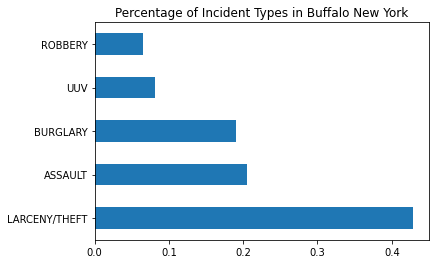

In [ ]:
incident[:5].plot(kind='barh')
plt.title('Percentage of Incident Types in Buffalo New York')

Top **5** incident types include : 
> - Robbery

> - Uuv

> - Burglary

> - Assault

> - Larceny/Theft

And **Larceny/Theft** is about double compare to the **2nd/3rd** incident

2) The Neighborhood with the most incident

In [ ]:
neighbor_incident= results_df['neighborhood_1'].value_counts(normalize= True)
neighbor_incident

Broadway Fillmore     0.057951
Central               0.054140
Kensington-Bailey     0.052799
North Park            0.049096
Genesee-Moselle       0.045973
Schiller Park         0.043036
Elmwood Bidwell       0.042362
Elmwood Bryant        0.040737
Upper West Side       0.038645
University Heights    0.038212
West Side             0.036193
Kenfield              0.036087
Riverside             0.033325
Lovejoy               0.031660
Masten Park           0.031536
Lower West Side       0.027841
Hopkins-Tifft         0.026015
Delavan Grider        0.025793
Fillmore-Leroy        0.024058
Allentown             0.023570
Seneca-Cazenovia      0.022775
South Park            0.021347
MLK Park              0.021150
Parkside              0.019211
West Hertel           0.019047
Fruit Belt            0.018964
Black Rock            0.016449
Hamlin Park           0.016129
Pratt-Willert         0.015320
Grant-Amherst         0.014777
Ellicott              0.013396
Kaisertown            0.012539
Central 

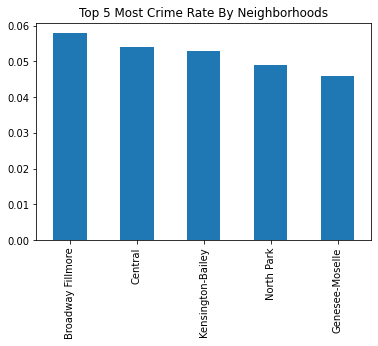

In [ ]:
neighbor_incident.sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Top 5 Most Crime Rate By Neighborhoods')
plt.show()

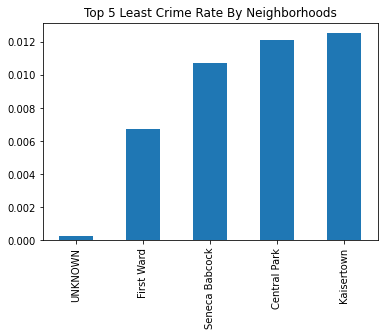

In [ ]:
neighbor_incident.sort_values(ascending=True)[:5].plot(kind='bar')
plt.title('Top 5 Least Crime Rate By Neighborhoods')
plt.show()

In general, there is **no** neighborhood with significant **high** crime rate in Buffalo.

On the other hand, there is a **huge different** between the least crime neighborhood and the most crime neighborhood. Therefore, there are some neighborhoods that are safer than others.

3) When is the crime likely committed? 

Text(0.5, 1.0, 'Numbers of Crime Hourly')

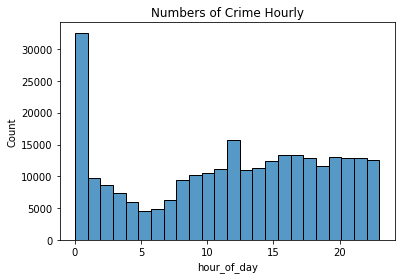

In [ ]:
sns.histplot(results_df.hour_of_day,bins=24)
plt.title('Numbers of Crime Hourly')

Crimes happen the most around **12AM midnight** and **12pm midday** comes secondly.

Crimes happen the least early in the morning from **4AM to 7AM**.

There is **no significant different** for other hour during the day.

Text(0.5, 1.0, 'Numbers of Crime Daily')

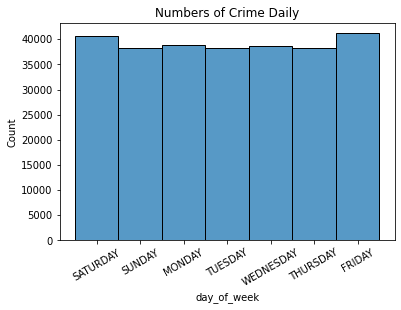

In [ ]:
ax=sns.histplot(results_df.day_of_week)
plt.xticks(rotation=30)
plt.title('Numbers of Crime Daily')

Crimes happen about the same everyday of the week.

Friday and Saturday is little higher compares to others.

In [ ]:
#count the crime numbers by month
monthly_crime= results_df.incident_datetime.dt.month.value_counts().rename_axis('month').reset_index(name='counts')
monthly_crime

,month,counts
0,7,28644
1,8,28444
2,9,25575
3,10,25139
4,6,24513
5,5,23237
6,11,22732
7,12,21839
8,1,20407
9,4,19793


In [ ]:
monthly_crime= monthly_crime.sort_values('month')
monthly_crime

,month,counts
8,1,20407
11,2,15954
10,3,18143
9,4,19793
5,5,23237
4,6,24513
0,7,28644
1,8,28444
2,9,25575
3,10,25139


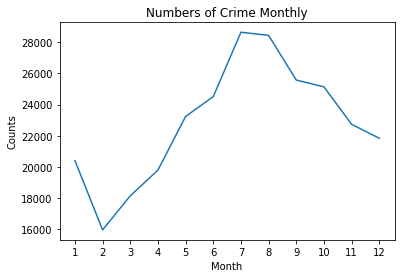

In [ ]:
plt.plot(monthly_crime.month, monthly_crime.counts)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(monthly_crime.month)
plt.title("Numbers of Crime Monthly")
plt.show()

Crimes happen the most on July and the least on February.

Compare to Winter (from December to March), there are more crimes on Summer (from June to September)

According to the Internet, February is the snowniest month, that maybe a reason we have the least crime on February.

In [ ]:
yearly_crime= results_df.incident_datetime.dt.year.value_counts().rename_axis('year').reset_index(name='counts')
yearly_crime

,year,counts
0,2007,21810
1,2009,21692
2,2010,21557
3,2012,20507
4,2006,19319
5,2011,18954
6,2013,18537
7,2014,17423
8,2015,17203
9,2016,16390


In [ ]:
#Note: The data become unreliable before January 2009 and do not provide a complete picture of incidents responded to by the Buffalo Police Department.
# We will look only from 2009 to 2021

yearly_crime= yearly_crime[(yearly_crime.year>2008) & (yearly_crime.year<2022)].sort_values('year')
yearly_crime

,year,counts
1,2009,21692
2,2010,21557
5,2011,18954
3,2012,20507
6,2013,18537
7,2014,17423
8,2015,17203
9,2016,16390
11,2017,15354
10,2018,15422


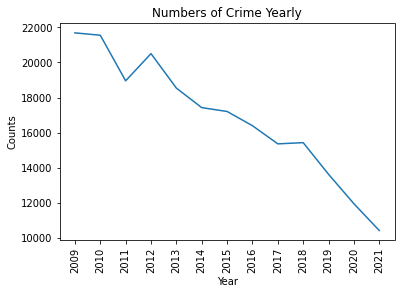

In [ ]:
plt.plot(yearly_crime.year, yearly_crime.counts)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(yearly_crime.year,rotation =90)
plt.title("Numbers of Crime Yearly")
plt.show()

Overall, we have a **good sign** when the numbers of crime **decline** over year.

## <C> Insights

> - Larency/Theft is the most popular crime in Buffalo, New York

> - Broadway Fillmore is the neighborhood that has the most numbers of crime. However, there is no neighborhood with significant outnumber.

> - Crimes are likely happened most around 12AM midnight and 12PM midday place secondly. On the other hand, they are happened least early in the morning from 4AM to 7AM

> - Summer's crime rate outnumber Winter's crime rate. Also, crime rate is significant low on February when it is also the snowniest month in Buffalo.

> - Year over year, we witness the decline of crime rate in Buffalo, New York which is a good sign.